<a href="https://colab.research.google.com/github/im-hjk/dankook_dacon/blob/master/GBM)%26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 임포트 하는 부분!

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import graphviz
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import io
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

#데이터 로딩!!

In [5]:
data_dir = Path('/content/drive/My Drive/Colab Notebooks/dacon_dkdkdk/data/dacon-dku')
feature_dir = Path('/content/drive/My Drive/Colab Notebooks/dacon_dkdkdk/build/feature')
sub_dir = Path('/content/drive/My Drive/Colab Notebooks/dacon_dkdkdk/build/sub')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
seed = 42

In [6]:
algo_name = 'lgb'
feature_name = 'feature'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
sub_file = sub_dir / f'{model_name}.csv'

In [7]:
df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
df.head()

(400000, 20)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,-15.0556
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,-0.3069
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,-0.9014
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,-1.3906
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,-9.3609


In [8]:
y = df[target_col].values[:320000]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:320000]
tst = df.iloc[320000:]
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(320000,) (320000, 19) (80000, 19)


#학습 / 검증 구분하기!!


In [9]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(256000, 19) (64000, 19) (256000,) (64000,)


#학습하기!!!


In [10]:
clf = lgb.LGBMClassifier(objective='multiclass',
                         n_estimators=1000,
                         num_leaves=64,
                         learning_rate=0.1,
                         min_child_samples=10,
                         subsample=.5,
                         subsample_freq=1,
                         colsample_bytree=.8,
                         random_state=seed,
                         n_jobs=-1)
clf.fit(X_trn, y_trn,
        eval_set=[(X_val, y_val)],
        eval_metric='multiclass',
        early_stopping_rounds=10)
p_val = clf.predict(X_val)
p_tst = clf.predict(tst)

[1]	valid_0's multi_logloss: 0.889466
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 0.809411
[3]	valid_0's multi_logloss: 0.737205
[4]	valid_0's multi_logloss: 0.67578
[5]	valid_0's multi_logloss: 0.622648
[6]	valid_0's multi_logloss: 0.58102
[7]	valid_0's multi_logloss: 0.541851
[8]	valid_0's multi_logloss: 0.509749
[9]	valid_0's multi_logloss: 0.48277
[10]	valid_0's multi_logloss: 0.453402
[11]	valid_0's multi_logloss: 0.427857
[12]	valid_0's multi_logloss: 0.404554
[13]	valid_0's multi_logloss: 0.383858
[14]	valid_0's multi_logloss: 0.364991
[15]	valid_0's multi_logloss: 0.348485
[16]	valid_0's multi_logloss: 0.334275
[17]	valid_0's multi_logloss: 0.321026
[18]	valid_0's multi_logloss: 0.308562
[19]	valid_0's multi_logloss: 0.297153
[20]	valid_0's multi_logloss: 0.287213
[21]	valid_0's multi_logloss: 0.277694
[22]	valid_0's multi_logloss: 0.268968
[23]	valid_0's multi_logloss: 0.261297
[24]	valid_0's multi_logloss: 0.254532
[25]	valid_0's

In [11]:
print(f'{accuracy_score(y_val, p_val) * 100:.4f}%')

92.9359%


#중요도 시각화!!

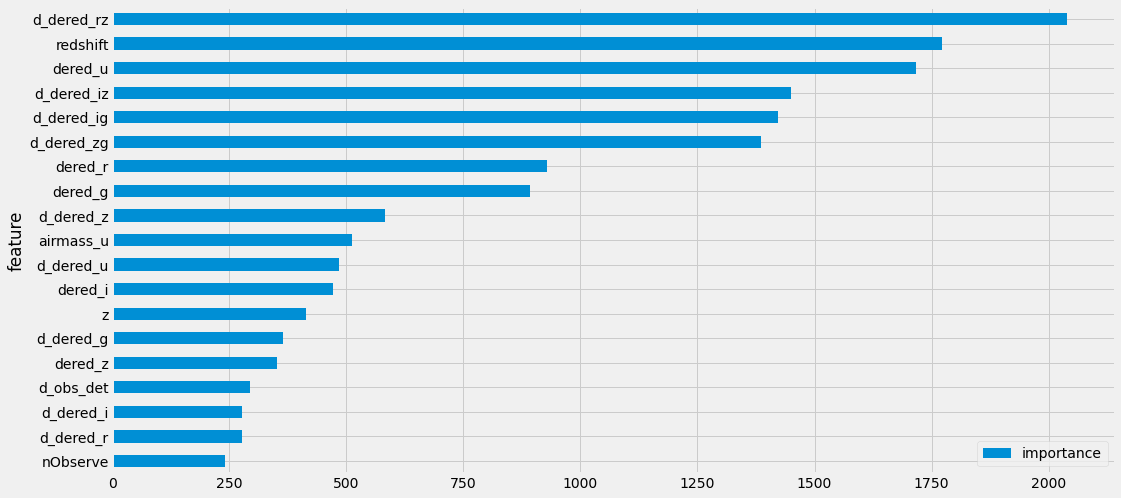

In [12]:
imp = pd.DataFrame({'feature': trn.columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

#제출파일 생성!!

In [13]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [14]:
sub[target_col] = p_tst
sub.head()

,class
id,
320000,2.0
320001,0.0
320002,2.0
320003,0.0
320004,2.0


In [15]:
sub[target_col].value_counts()

2.0    41353
0.0    29982
1.0     8665
Name: class, dtype: int64

In [16]:
sub.to_csv(sub_file)